In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#norm pdf and cdf
N = scipy.stats.norm.cdf
N_prime = scipy.stats.norm.pdf

#create class for BS European option
class BlackScholes_Euro:
	def __init__(self, call_put, S, K, r, t, T, sigma):
		self.call_put = call_put
		self.S = S
		self.K = K
		self.r = r
		self.T=T
		self.t=t
		self.tau = self.T-self.t
		self.sigma = sigma
		self.d1 = (np.log(self.S / self.K) + (self.r + self.sigma ** 2 / 2) * self.tau) / (self.sigma * np.sqrt(self.tau))
		self.d2 = self.d1 - self.sigma * np.sqrt(self.tau)

	def Price(self):
		if self.call_put == "c":
			return N(self.d1) * self.S - N(self.d2) * self.K * np.exp(-self.r * self.tau)
		elif self.call_put=="p":
			return N(-self.d2) * self.K * np.exp(-self.r * self.tau) - N(-self.d1) * self.S
		else:
			return "Please specify whether call/put!"

	def delta(self):
		if self.call_put == "c":
			return N(self.d1)
		elif self.call_put == "p":
			return N(self.d1) - 1
		else:
			return "Please specify whether call/put!"

	def gamma(self):
		if self.call_put != "c" or self.call_put != "p":
			return N_prime(self.d1) / (self.S * self.sigma * np.sqrt(self.tau))
		else:
			return "Please specify whether call/put!"

	def vega(self):
		if self.call_put != "c" or self.call_put != "p":
			return self.S * N_prime(self.d1) / (self.sigma * np.sqrt(self.tau))
		else:
			return "Please specify whether call/put!"

	def theta(self):
		if self.call_put=="c":
			return -(self.S*N_prime(self.d1)*self.sigma)/(2*np.sqrt(self.tau)) - self.r*self.K*np.exp(-(self.r*self.tau))*N(self.d2)
		elif self.call_put=="p":
			return -(self.S * N_prime(self.d1) * self.sigma) / (2 * np.sqrt(self.tau)) + self.r * self.K * np.exp(-(self.r * self.tau)) * N(-self.d2)
		else:
			return "Please specify whether call/put!"

	def rho(self):
		if self.call_put=="c":
			return self.K*self.tau*np.exp(-self.r*self.tau)*N(self.d2)
		elif self.call_put=="p":
			return -self.K*self.tau*np.exp(-self.r*self.tau)*N(self.d2)

	def plot_greeks(self,greek,changed_param,start=None,end=None):
		# Generate the end points for the param that we want to vary (default set to 0 and 2 times the stock price)
		#parameters that can be varied (S, K, r, t)
		if start is None:
			start=0.001
		if end is None:
			if changed_param=="S":
				end=self.S*2
			elif changed_param=="K":
				end=self.K*2
			elif changed_param=="r":
				end=self.r*2
			elif changed_param=="t":
				end=self.tau*2
			elif changed_param=="sigma":
				end=self.sigma*2

		#generate the range for the parameter that we want to vary
		changed_param_range = np.linspace(start, end,200)

		# create new options for values in the range desired
		if changed_param == "S":
			opt_range=[BlackScholes_Euro(self.call_put,i,self.K,self.r,self.t,self.T,self.sigma) for i in changed_param_range]
		elif changed_param == "K":
			opt_range=[BlackScholes_Euro(self.call_put,self.S,i,self.r,self.t,self.T,self.sigma) for i in changed_param_range]
		elif changed_param == "r":
			opt_range=[BlackScholes_Euro(self.call_put,self.S,self.K,i,self.t,self.T,self.sigma) for i in changed_param_range]
		elif changed_param == "t":
			opt_range=[BlackScholes_Euro(self.call_put,self.S,self.K,self.r,i,self.T,self.sigma) for i in changed_param_range]
		elif changed_param == "sigma":
			opt_range=[BlackScholes_Euro(self.call_put,self.S,self.K,self.r,self.t,self.T,i) for i in changed_param_range]

		#calculate the desired for all the options
		greek_range=[getattr(i,greek)() for i in opt_range]

		plt.plot(changed_param_range,greek_range)
		plt.xlabel(changed_param)
		plt.ylabel(greek)
		plt.title(f"{greek} vs {changed_param}")

		#set grid
		plt.grid("True")

		# Add text box with parameters
		parameters = f"Call/Put: {self.call_put}\nS: {self.S}\nK: {self.K}\nr: {self.r}\nt: {self.tau}\nsigma: {self.sigma}"
		plt.text(0.05, 0.05, parameters, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
		plt.show()


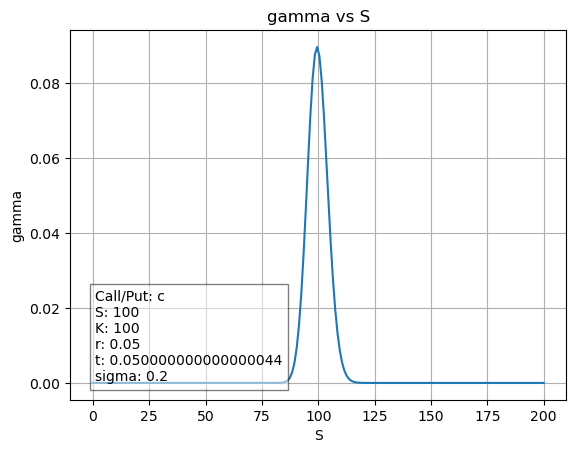

0.5311903286603664

In [3]:
# Example usage
call_put = "c"
S = 100
K = 100
r = 0.05
t = 1.95
T=2
sigma = 0.2
plot_start=0
plot_end=400

option=BlackScholes_Euro(call_put, S, K, r, t,T, sigma)
option.plot_greeks("gamma","S")
# option.plot_greeks("delta","K")
option.delta()

In [4]:
class Binary_Euro(BlackScholes_Euro):
    def __init__(self, call_put, S, K, r, t, T, sigma):
        super().__init__(call_put, S, K, r, t, T, sigma)
    
    def Price(self):
        if self.call_put == "c":
            return np.exp(self.tau)*N(self.d2)
        elif self.call_put=="p":
            return np.exp(self.tau)*N(-self.d2)
        else:
            return "Please specify whether call/put!"
        
    def delta(self):
        if self.call_put == "c":
            return np.exp(-self.r*self.tau)*N_prime(self.d2)/(self.S*self.sigma*np.sqrt(self.tau))
        elif self.call_put=="p":
            return -np.exp(-self.r*self.tau)*N_prime(self.d2)/(self.S*self.sigma*np.sqrt(self.tau))
        else:
            return "Please specify whether call/put!"
    
    def gamma(self):
        if self.call_put == "c":
            return np.exp(-self.r*self.tau)*N_prime(self.d2)/(self.S*self.sigma*np.sqrt(self.tau))**2
        elif self.call_put=="p":
            return np.exp(-self.r*self.tau)*N_prime(self.d2)/(self.S*self.sigma*np.sqrt(self.tau))**2
        else:
            return "Please specify whether call/put!"
        
    def vega(self):
        if self.call_put == "c":
            return -np.exp(-self.r*self.tau)*N_prime(self.d2)*(self.d1/self.sigma)
        elif self.call_put=="p":
            return -np.exp(-self.r*self.tau)*N_prime(self.d2)*(self.d1/self.sigma)
        else:
            return "Please specify whether call/put!"
    
    def theta(self):
        # if self.call_put == "c":
        #     return -(self.S*N_prime(self.d1)*self.sigma)/(2*np.sqrt(self.tau)) - self.r*self.K*np.exp(-(self.r*self.tau))*N(self.d2)
        # elif self.call_put=="p":
        #     return -(self.S * N_prime(self.d1) * self.sigma) / (2 * np.sqrt(self.tau)) + self.r * self.K * np.exp(-(self.r * self.tau)) * N(-self.d2)
        # else:
        #     return "Please specify whether call/put!"
        pass
    def plot_greeks(self,greek,changed_param,start=None,end=None):
		# Generate the end points for the param that we want to vary (default set to 0 and 2 times the stock price)
		#parameters that can be varied (S, K, r, t)
        if start is None:
            start=0.001
        if end is None:
            if changed_param=="S":
                end=self.S*2
            elif changed_param=="K":
                end=self.K*2
            elif changed_param=="r":
                end=self.r*2
            elif changed_param=="t":
                end=self.tau*2
            elif changed_param=="sigma":
                end=self.sigma*2

		#generate the range for the parameter that we want to vary
        changed_param_range = np.linspace(start, end,200)

		# create new options for values in the range desired
        if changed_param == "S":
            opt_range=[Binary_Euro(self.call_put,i,self.K,self.r,self.t,self.T,self.sigma) for i in changed_param_range]
        elif changed_param == "K":
            opt_range=[Binary_Euro(self.call_put,self.S,i,self.r,self.t,self.T,self.sigma) for i in changed_param_range]
        elif changed_param == "r":
            opt_range=[Binary_Euro(self.call_put,self.S,self.K,i,self.t,self.T,self.sigma) for i in changed_param_range]
        elif changed_param == "t":
            opt_range=[Binary_Euro(self.call_put,self.S,self.K,self.r,i,self.T,self.sigma) for i in changed_param_range]
        elif changed_param == "sigma":
            opt_range=[Binary_Euro(self.call_put,self.S,self.K,self.r,self.t,self.T,i) for i in changed_param_range]

		#calculate the desired for all the options
        greek_range=[getattr(i,greek)() for i in opt_range]
        plt.plot(changed_param_range,greek_range)
        plt.xlabel(changed_param)
        plt.ylabel(greek)
        plt.title(f"{greek} vs {changed_param}")

		#set grid
        plt.grid("True")

		# Add text box with parameters
        parameters = f"Call/Put: {self.call_put}\nS: {self.S}\nK: {self.K}\nr: {self.r}\nt: {self.tau}\nsigma: {self.sigma}"
        plt.text(0.05, 0.05, parameters, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
        plt.show()

    


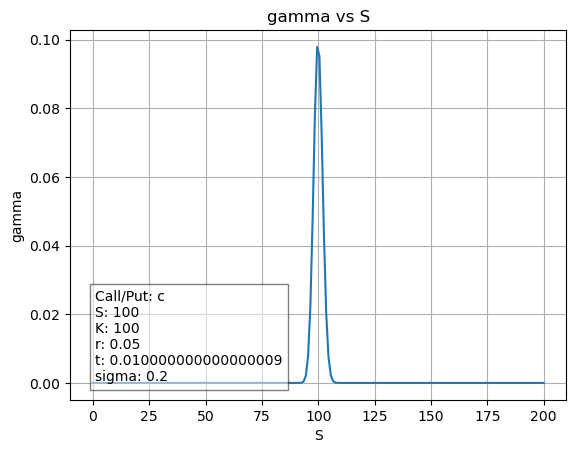

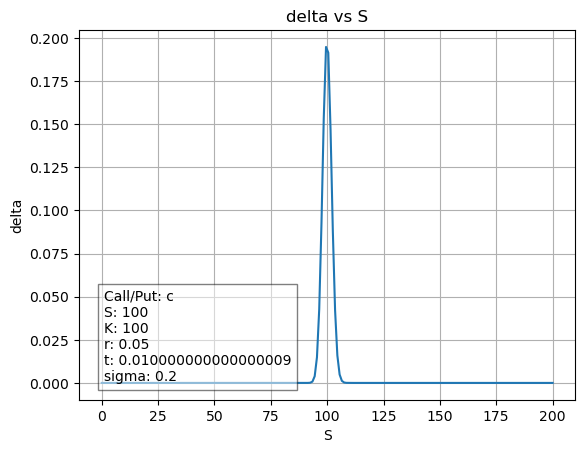

0.1993490015361278


In [5]:
call_put = "c"
S = 100
K = 100
r = 0.05
t = 1.99
T=2
sigma = 0.2
plot_start=0
plot_end=400

option_1=Binary_Euro(call_put, S, K, r, t,T, sigma)
option_1.plot_greeks("gamma","S")
option_1.plot_greeks("delta","S")
# option.plot_greeks("delta","K")       

print(option_1.delta())

# np.exp(-option_1.r*option_1.tau)*N_prime(option_1.d2)/(option_1.S*option_1.sigma*np.sqrt(option_1.tau))